In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (14,8)

In [3]:
data = pd.read_csv('./train.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capital,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Merge
- suicides_no, population : 합

In [5]:
sr_sum = data.groupby('country_year')['suicides_no','population'].agg('sum')
sr_sum.head()

,suicides_no,population
country_year,,
Albania1987,73,2709600
Albania1988,63,2764300
Albania1989,68,2803100
Albania1992,47,2822500
Albania1993,73,2807300


In [6]:
sr_con = data.groupby('country_year').agg('min')
sr_con.drop(columns=['suicides_no','population'], inplace=True)
sr_con.head()

,country,year,sex,age,suicides_100k_pop,HDI_for_year,gdp_for_year,gdp_per_capital,generation
country_year,,,,,,,,,
Albania1987,Albania,1987,female,15-24 years,0.0,NaN,"2,156,624,900",796,Boomers
Albania1988,Albania,1988,female,15-24 years,0.0,NaN,"2,126,000,000",769,Boomers
Albania1989,Albania,1989,female,15-24 years,0.0,NaN,"2,335,124,988",833,Boomers
Albania1992,Albania,1992,female,15-24 years,0.0,NaN,"709,452,584",251,Boomers
Albania1993,Albania,1993,female,15-24 years,0.0,NaN,"1,228,071,038",437,Boomers


In [7]:
merged_data = pd.merge(sr_sum, sr_con, left_index=True, right_index=True)
merged_data.head()

,suicides_no,population,country,year,sex,age,suicides_100k_pop,HDI_for_year,gdp_for_year,gdp_per_capital,generation
country_year,,,,,,,,,,,
Albania1987,73,2709600,Albania,1987,female,15-24 years,0.0,NaN,"2,156,624,900",796,Boomers
Albania1988,63,2764300,Albania,1988,female,15-24 years,0.0,NaN,"2,126,000,000",769,Boomers
Albania1989,68,2803100,Albania,1989,female,15-24 years,0.0,NaN,"2,335,124,988",833,Boomers
Albania1992,47,2822500,Albania,1992,female,15-24 years,0.0,NaN,"709,452,584",251,Boomers
Albania1993,73,2807300,Albania,1993,female,15-24 years,0.0,NaN,"1,228,071,038",437,Boomers


## drop
- suicides_100k_pop
- sex
- generation
- age
- gdp_for_year

In [8]:
merged_data.drop(columns=['suicides_100k_pop', 'sex', 'generation', 'age', 'gdp_for_year'], inplace=True)

In [10]:
merged_data.head()

,suicides_no,population,country,year,HDI_for_year,gdp_per_capital
country_year,,,,,,
Albania1987,73,2709600,Albania,1987,NaN,796
Albania1988,63,2764300,Albania,1988,NaN,769
Albania1989,68,2803100,Albania,1989,NaN,833
Albania1992,47,2822500,Albania,1992,NaN,251
Albania1993,73,2807300,Albania,1993,NaN,437


## 최근 3개년만 남기자

In [14]:
len(merged_data.country.unique())

100

In [21]:
data_by_country = merged_data.groupby('country')

In [36]:
data_by_country.year.max()

country
Albania                         2010
Antigua and Barbuda             2014
Argentina                       2014
Armenia                         2014
Aruba                           2011
Australia                       2014
Austria                         2014
Azerbaijan                      2007
Bahamas                         2013
Bahrain                         2014
Barbados                        2013
Belarus                         2014
Belgium                         2014
Belize                          2014
Bosnia and Herzegovina          2014
Brazil                          2014
Bulgaria                        2014
Cabo Verde                      2011
Canada                          2013
Chile                           2014
Colombia                        2014
Costa Rica                      2014
Croatia                         2014
Cuba                            2014
Cyprus                          2014
Czech Republic                  2014
Denmark                       

In [39]:
merged_data[merged_data.country=='Dominica']

,suicides_no,population,country,year,HDI_for_year,gdp_per_capital
country_year,,,,,,
Dominica1985,0,66400,Dominica,1985,NaN,1485


### fillna

In [9]:
merged_data.isna().sum()

suicides_no           0
population            0
HDI_for_year       1546
gdp_per_capital       0
dtype: int64

In [10]:
merged_data.fillna(merged_data.HDI_for_year.mean(), inplace=True)

In [11]:
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2243 entries, Albania1987 to Uzbekistan2014
Data columns (total 4 columns):
suicides_no        2243 non-null int64
population         2243 non-null int64
HDI_for_year       2243 non-null float64
gdp_per_capital    2243 non-null int64
dtypes: float64(1), int64(3)
memory usage: 167.6+ KB


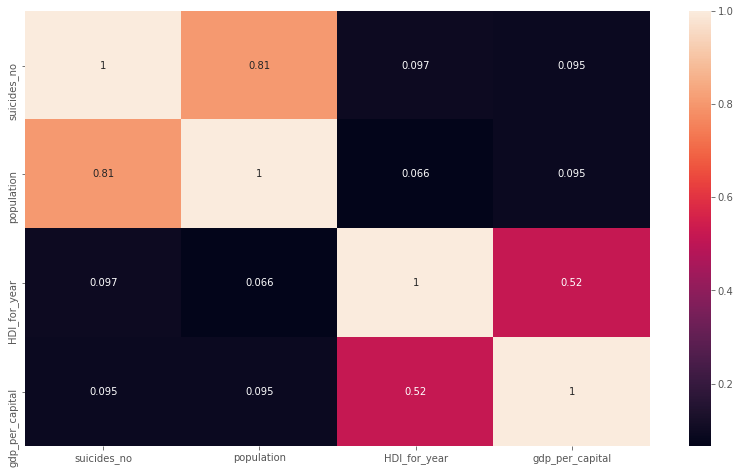

In [12]:
# 다중공선성
sns.heatmap(merged_data.corr(),annot=True)

## dataset 나누기

In [69]:
len(merged_data)*0.7

1570.1

In [70]:
dataset = merged_data.sample(frac=1)
X_train = dataset[:1570].drop(columns='suicides_no').values
y_train = dataset[:1570].suicides_no.values.reshape([-1, 1])
X_test = dataset[1570:].drop(columns='suicides_no').values
y_test = dataset[1570:].suicides_no.values.reshape([-1, 1])

In [71]:
y_train[:10]

array([[ 4000],
       [ 1307],
       [   67],
       [  514],
       [ 2658],
       [ 4463],
       [    6],
       [  276],
       [    1],
       [11073]], dtype=int64)

In [72]:
X_train[:10]

array([[9.75495600e+06, 7.76601148e-01, 3.97000000e+03],
       [1.06780230e+07, 7.76601148e-01, 5.48800000e+03],
       [5.24940000e+05, 8.92000000e-01, 1.26352000e+05],
       [3.84928000e+06, 8.95000000e-01, 2.98030000e+04],
       [9.20574600e+06, 7.76601148e-01, 6.60100000e+03],
       [1.28570308e+08, 7.76601148e-01, 3.31000000e+03],
       [2.33700000e+05, 7.76601148e-01, 7.33300000e+03],
       [3.20820000e+06, 7.42000000e-01, 6.63800000e+03],
       [9.51020000e+04, 7.39000000e-01, 8.18800000e+03],
       [7.82420660e+07, 8.55000000e-01, 2.49220000e+04]])

## 데이터 정규화

In [73]:
from sklearn.preprocessing import normalize

In [74]:
X_train = normalize(X_train, axis=0, norm='l1')
X_test = normalize(X_test, axis=0, norm='l1')

In [75]:
X_train[:10]

array([[2.86486776e-04, 6.36539717e-04, 1.54515387e-04],
       [3.13595714e-04, 6.36539717e-04, 2.13597089e-04],
       [1.54166117e-05, 7.31126177e-04, 4.91771491e-03],
       [1.13046929e-04, 7.33585121e-04, 1.15995519e-03],
       [2.70357395e-04, 6.36539717e-04, 2.56915887e-04],
       [3.77589536e-03, 6.36539717e-04, 1.28827691e-04],
       [6.86337895e-06, 6.36539717e-04, 2.85405878e-04],
       [9.42194794e-05, 6.08178950e-04, 2.58355955e-04],
       [2.79298701e-06, 6.05720005e-04, 3.18683121e-04],
       [2.29783889e-03, 7.00799194e-04, 9.69982992e-04]])

# 선형회귀 

In [76]:
EPOCH = 10000
LR = 0.1

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_uniform([3, 1], -10, 10), name='weight')
b = tf.Variable(tf.random_uniform([1], -10, 10), name='bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.AdamOptimizer(learning_rate=LR)

train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(EPOCH):

    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={X: X_train, Y: y_train})
    if step%1000 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  56751970.0 
Prediction:
 [[-3.265637 ]
 [-3.2658067]
 [-3.2937918]
 ...
 [-3.2652433]
 [-3.2709546]
 [-3.268434 ]]
1000 Cost:  56189532.0 
Prediction:
 [[96.09069 ]
 [96.0991  ]
 [96.51832 ]
 ...
 [96.08225 ]
 [96.12999 ]
 [96.092064]]
2000 Cost:  55653452.0 
Prediction:
 [[194.21553]
 [194.23245]
 [195.09424]
 ...
 [194.19835]
 [194.29881]
 [194.22087]]
3000 Cost:  55140850.0 
Prediction:
 [[291.5275 ]
 [291.5529 ]
 [292.85422]
 ...
 [291.50162]
 [291.65433]
 [291.53665]]
4000 Cost:  54649828.0 
Prediction:
 [[388.31747]
 [388.35132]
 [390.09033]
 ...
 [388.28293]
 [388.48764]
 [388.33038]]
5000 Cost:  54179212.0 
Prediction:
 [[484.76242]
 [484.8047 ]
 [486.98022]
 ...
 [484.71924]
 [484.9757 ]
 [484.77902]]
6000 Cost:  53728376.0 
Prediction:
 [[580.9567 ]
 [581.00745]
 [583.61865]
 ...
 [580.9049 ]
 [581.2131 ]
 [580.977  ]]
7000 Cost:  53297000.0 
Prediction:
 [[676.93774]
 [676.9969 ]
 [680.04315]
 ...
 [676.8773 ]
 [677.237  ]
 [676.9616 ]]
8000 Cost:  52884924.0 
Predi

In [66]:
cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={X: X_test, Y: y_test})
print("Cost: ", cost_val, "\nPrediction:\n", hy_val)

Cost:  56026210.0 
Prediction:
 [[1018.56647]
 [1001.5855 ]
 [1006.8094 ]
 [1013.96265]
 [1017.5702 ]
 [1016.5326 ]
 [1003.0217 ]
 [1006.4484 ]
 [ 995.91425]
 [1089.4677 ]
 [1008.4316 ]
 [1040.9669 ]
 [ 996.79297]
 [1000.4948 ]
 [1005.6238 ]
 [1002.1322 ]
 [1005.83685]
 [1077.9957 ]
 [1030.0259 ]
 [1057.3677 ]
 [1027.9927 ]
 [1008.24976]
 [1150.0479 ]
 [1052.0355 ]
 [1078.7991 ]
 [1021.9433 ]
 [1022.892  ]
 [1014.30505]
 [1000.2124 ]
 [ 997.9702 ]
 [ 994.57764]
 [1015.35706]
 [1033.5317 ]
 [1048.7042 ]
 [1035.2518 ]
 [1009.27484]
 [1015.0111 ]
 [1000.7003 ]
 [ 999.49615]
 [1066.764  ]
 [1005.66675]
 [1014.54114]
 [1039.3618 ]
 [1018.4724 ]
 [1012.6819 ]
 [1005.84894]
 [1000.2391 ]
 [1016.7567 ]
 [1074.8966 ]
 [1013.8295 ]
 [ 992.9731 ]
 [1048.8508 ]
 [1009.51483]
 [1052.9283 ]
 [1025.644  ]
 [1007.34357]
 [1040.8821 ]
 [1000.6439 ]
 [1068.012  ]
 [1089.4612 ]
 [1009.11914]
 [ 997.9749 ]
 [1007.1055 ]
 [1012.06604]
 [1063.9612 ]
 [1016.63806]
 [1110.9281 ]
 [1013.38293]
 [ 999.7606 ]
 [

# 시계열 데이터로 합시당 ㅎㅅㅎ